In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor


In [17]:
df = pd.read_csv("DBS.csv")
print(df.head())
print(df.info())

      Date  ExchangeRate  DBSPrice
0  29/8/25        1.2838     50.52
1  28/8/25        1.2826     50.33
2  27/8/25        1.2861     50.17
3  26/8/25        1.2852     50.02
4  25/8/25        1.2857     50.33
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          753 non-null    object 
 1   ExchangeRate  753 non-null    float64
 2   DBSPrice      753 non-null    float64
dtypes: float64(2), object(1)
memory usage: 17.8+ KB
None


In [18]:
X = df[["ExchangeRate"]].values
y = df["DBSPrice"].values

In [19]:
split_idx = int(len(df) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
y_pred = model.predict(X_test)

In [23]:
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

Coefficient (slope): -134.78037764710447
Intercept: 216.1259937496639
MAE: 4.575667084090023
RMSE: 5.01500553535586
R²: -31.616134433221703


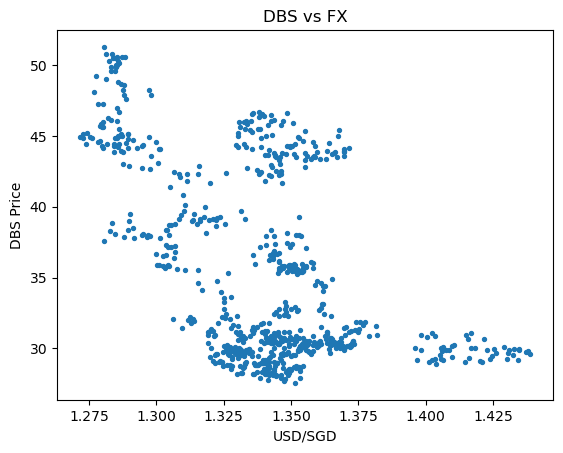

In [24]:
plt.scatter(X, y, s=8)
plt.xlabel("USD/SGD")
plt.ylabel("DBS Price")
plt.title("DBS vs FX")
plt.show()

In [27]:
rf = RandomForestRegressor(
    n_estimators=300,     
    random_state=42,
    n_jobs=-1  
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

MAE: 3.01238643338142
RMSE: 4.577201174078311
R²: -26.17000112358116
